# <center> **Assignment 1** </centre>

## **Question 1**
### **Part a)**
**Modify Program 2.7 to plot the phase space trajectories with different methods, including Euler, RK2, and leapfrog. Of course, you can use the derivative function oscillator() as is with the leapfrog() function. However, with the Euler and RK2 methods, you need a slightly different derivative function, call it oscillator_rk(y,t). It is similar to freefall() in Program 2.5 but returns the RHS of the
oscillator equations (2.46) based on the input of the 2-element array y[], with y[0] = position and y[1] = velocity. Run the program with different initial conditions: x = 1 and 1.5, and v = 0.**

#### We can change the initial condition just by replacing  x0 =1  to x0 = 1.5 and v0 = 0

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1.0  # Spring constant
m = 1.0  # Mass
omega = np.sqrt(k / m)  # Angular frequency

# Time parameters
t_max = 15 # Maximum time
dt = 0.01  # Time step
n_steps = int(t_max / dt)  # Number of time steps

# Initial conditions
x0 = 1.0  # Initial displacement
v0 = 0.0 # Initial velocity

# Arrays to store position, velocity, kinetic energy, potential energy, and time
x = np.zeros(n_steps)
v = np.zeros(n_steps)
KE = np.zeros(n_steps)
PE = np.zeros(n_steps)
t = np.zeros(n_steps)

# Initialize arrays for position, velocity, kinetic energy, potential energy, and time
x_euler = np.zeros(n_steps)
v_euler = np.zeros(n_steps)
KE_euler = np.zeros(n_steps)
PE_euler = np.zeros(n_steps)

# Initialize arrays for position, velocity, kinetic energy, potential energy, and time
x_rk2 = np.zeros(n_steps)
v_rk2 = np.zeros(n_steps)
KE_rk2 = np.zeros(n_steps)
PE_rk2 = np.zeros(n_steps)

### Leapfrog integration

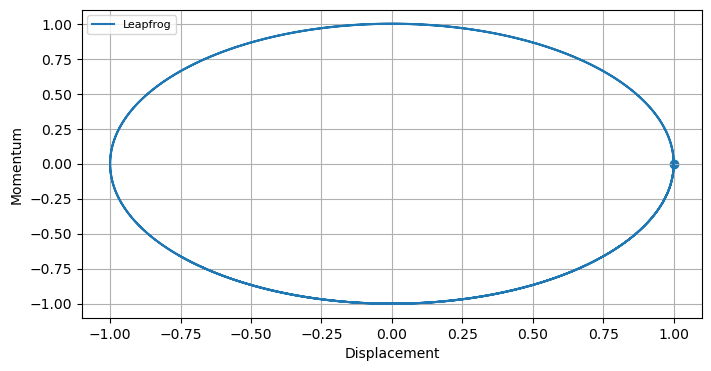

In [88]:

# Initial conditions
x[0] = x0
v[0] = v0

#Time Integration Loop using leapfrog Method
for i in range(1, n_steps):
    t[i] = t[i-1] + dt
    x_half = x[i-1] + 0.5 * v[i-1] * dt        # half step in x
    v[i] = v[i-1] + (-k / m) * x_half * dt     # full step in v 
    x[i] = x_half + 0.5 * v[i] * dt            # remaining half step in x
    
    KE[i] = 0.5 * m * v[i]**2   # kinetic energy
    PE[i] = 0.5 * k * x[i]**2   # potential enegy

# Calculate total energy (should remain constant)
E_total = KE + PE

plt.figure(figsize=(8,4))
plt.plot(x, m*v , label='Leapfrog') # Phase space trajectory for Leapfrog method
plt.xlabel('Displacement')
plt.ylabel('Momentum')
plt.legend(loc='upper left', fontsize= 8)
plt.grid()
plt.scatter(x0,v0)
plt.show()

We have stimulated the motion of a simple harmonic oscillator using the leapfrog method. It integrates the equations of motion for the oscillator over a specified time interval, calculating the displacement and velocity at each time step. In this method, first step is to take half step in x, then a full step in v and finally, remaining half step in x. The trajectory of the oscillator in phase space (displacement vs. momentum) is then plotted, illustrating how the system evolves over time. It's a second-order method. The total energy of the system remains constant throughout the simulation, confirming the conservation of energy characteristic of conservative systems. 

### Euler's method integration

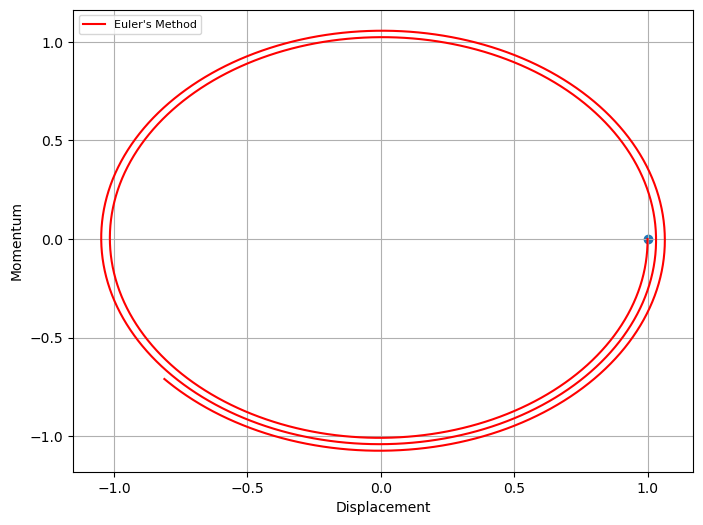

In [89]:

# Set initial conditions
x_euler[0] = x0  
v_euler[0] = v0 

#Time Integration Loop using Euler's Method
for i in range(1,n_steps):
    t[i] = t[i-1] + dt
    v_euler[i] = v_euler[i-1] + (-k / m) * x_euler[i-1] * dt
    x_euler[i] = x_euler[i-1] + v_euler[i-1] * dt
    
    KE_euler[i] = 0.5 * m * v_euler[i]**2    # Kinetic Energy
    PE_euler[i] = 0.5 * k * x_euler[i]**2    # Potential Energy
    
# Calculate total energy (should remain constant)
E_total = KE_euler + PE_euler

plt.figure(figsize=(8,6))
plt.plot(x_euler, m*v_euler,color="red" , label="Euler's Method")   # phase space trajectory for Euler's method
plt.xlabel('Displacement')
plt.ylabel('Momentum')
plt.legend(loc='upper left', fontsize= 8)
plt.grid()
plt.scatter(x0,v0)
plt.show()


In this, we have stimulated the motion of a simple harmonic oscillator using the Euler's method. It is first-order accurate, so, the error in each step is proportional to the step size. It is computationally simple but less accurate. it is less accurate than leapfrog method, as we can see in the plot energy is not conserved.

### RK2 method integration

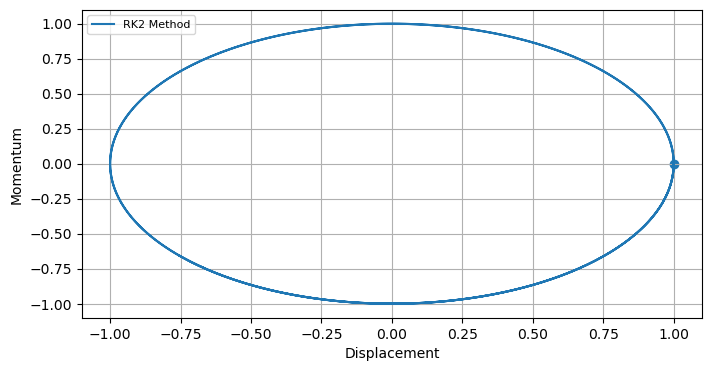

In [90]:
# Set initial conditions
x_rk2[0] = x0  
v_rk2[0] = v0 
#time integration by RK2 method
for i in range(1, n_steps):
    t[i] = t[i-1] + dt
    k1_x = v_rk2[i-1] * dt                              # slope of position at the beginning
    k1_v = (-k / m) * x_rk2[i-1] * dt                   # slope of velocity at the beginning
    k2_x = (v_rk2[i-1] + 0.5 * k1_v) * dt               # slope of position at the midpoint
    k2_v = (-k / m) * (x_rk2[i-1] + 0.5 * k1_x) * dt    # slope of velocity at the midpoint
    x_rk2[i] = x_rk2[i-1] + k2_x                        # new position
    v_rk2[i] = v_rk2[i-1] + k2_v                        # new velocity
    
    KE_rk2[i] = 0.5 * m * v_rk2[i]**2   # Kinetic Energy
    PE_rk2[i] = 0.5 * k * x_rk2[i]**2   # Potential Energy

# Calculate total energy (should remain constant)
E_total = KE_rk2 + PE_rk2

plt.figure(figsize=(8,4))
plt.plot(x_rk2, m*v_rk2, label="RK2 Method")
plt.xlabel('Displacement')
plt.ylabel('Momentum')
plt.legend(loc='upper left', fontsize= 8)
plt.grid()
plt.scatter(x0,v0)
plt.show()

RK2 is a second-order numerical method, and provides more accurate results compared to first-order methods Euler's method as we can see from the plot of the phase trajectory. 

### Combined Phase space Polt 

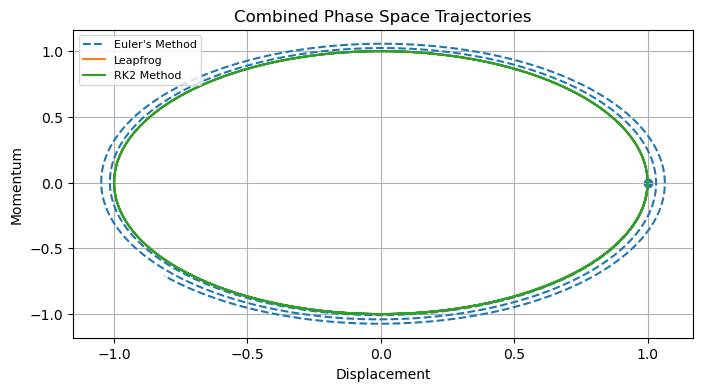

In [91]:
# Plotting

plt.figure(figsize=(8,4))
plt.plot(x_euler, m*v_euler, '--',label="Euler's Method") # Phase space trajectory for Euler's method
plt.plot(x, m*v, label='Leapfrog') # Phase space trajectory for Leapfrog method
plt.plot(x_rk2, m*v_rk2, label="RK2 Method") # Phase space trajectory for RK2 method
plt.title('Combined Phase Space Trajectories')
plt.xlabel('Displacement')
plt.ylabel('Momentum')
plt.legend(loc='upper left', fontsize= 8)
plt.grid()
plt.scatter(x0,v0)
plt.show()

## **part b)**
**Calculate the relative error in the energy of the harmonic oscillator with the same methods. Plot the results on a semilog scale as in Figure 2.7 with plt.semilogy() after the plot() function. All other plotting commands are the same.**

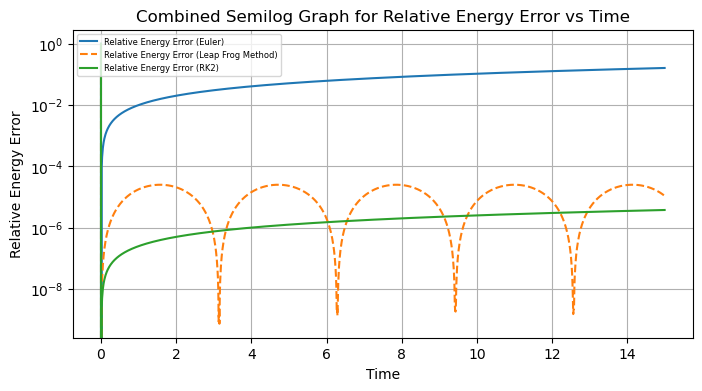

In [92]:
# Calculate relative energy error for euler method
E_total_euler = KE_euler + PE_euler
relative_error_euler = np.abs((E_total_euler - E_total_euler[1]) / E_total_euler[1])

# Calculate relative energy error for leap frog method
E_total = KE + PE
relative_error_leap_frog = np.abs((E_total - E_total[1]) / E_total[1])

# Calculate relative energy error for RK2 method
E_total_rk2 = KE_rk2 + PE_rk2
relative_error_rk2 = np.abs((E_total_rk2 - E_total_rk2[1]) / E_total_rk2[1])

# Plotting combined semilog graph
plt.figure(figsize=(8,4))

# Plotting energy and relative error on the same graph (semilogy graph)
plt.semilogy(t, relative_error_euler, label='Relative Energy Error (Euler)')
plt.semilogy(t, relative_error_leap_frog,'--', label='Relative Energy Error (Leap Frog Method)')
plt.semilogy(t, relative_error_rk2, label='Relative Energy Error (RK2)')
plt.xlabel('Time')
plt.ylabel('Relative Energy Error')
plt.title('Combined Semilog Graph for Relative Energy Error vs Time')
plt.legend(loc='upper left', fontsize= 6)

plt.grid(True)
plt.show()

The plot shows the relative energy error over time for each integration method. A lower relative energy error indicates better energy conservation and numerical stability. By comparing the relative energy errors for different methods, we can see that RK2 is better than Leapfrog method which is better than Euler's method in simulating the simple harmonic oscillator. 

## **part c)**
**Reduce the step size h by half and repeat (b). Discuss the changes and trends in the results.**

#### For initial conditian at x(0) = 1.5, v(0) = 0.0


Reducing the step size by half of the initial value, i.e.,
$\frac{dt}{2} = \frac{0.01}{2} = 0.005 \$


In [93]:
dt = 0.005  # Time step
n_steps = int(t_max / dt)  # Number of time steps

# Initial conditions
x0 = 1.0  # Initial displacement
v0 = 0.0 # Initial velocity


# Arrays to store position, velocity, kinetic energy, potential energy, and time
x = np.zeros(n_steps)
v = np.zeros(n_steps)
KE = np.zeros(n_steps)
PE = np.zeros(n_steps)
t = np.zeros(n_steps)

# Initialize arrays for position, velocity, kinetic energy, potential energy, and time
x_euler = np.zeros(n_steps)
v_euler = np.zeros(n_steps)
KE_euler = np.zeros(n_steps)
PE_euler = np.zeros(n_steps)

# Initialize arrays for position, velocity, kinetic energy, potential energy, and time
x_rk2 = np.zeros(n_steps)
v_rk2 = np.zeros(n_steps)
KE_rk2 = np.zeros(n_steps)
PE_rk2 = np.zeros(n_steps)

# Initial conditions
x0 = 1.0  # Initial displacement
v0 = 0.0 # Initial velocity

# # Leapfrog integration
# Initial conditions
x[0] = x0
v[0] = v0

for i in range(1, n_steps):
    t[i] = t[i-1] + dt
    x_half = x[i-1] + 0.5 * v[i-1] * dt     # half step in x
    v[i] = v[i-1] + (-k / m) * x_half * dt  # full step in v
    x[i] = x_half + 0.5 * v[i] * dt         # remaining half step in x
    
    KE[i] = 0.5 * m * v[i]**2  # Kinetic Energy
    PE[i] = 0.5 * k * x[i]**2  # Potential Energy



## Euler's method integration
# Set initial conditions
x_euler[0] = x0
v_euler[0] = v0
for i in range(1,n_steps):
    t[i] = t[i-1] + dt
    v_euler[i] = v_euler[i-1] + (-k / m) * x_euler[i-1] * dt
    x_euler[i] = x_euler[i-1] + v_euler[i-1] * dt
    KE_euler[i] = 0.5 * m * v_euler[i]**2
    PE_euler[i] = 0.5 * k * x_euler[i]**2
    

## RK2 method integration
# Set initial conditions
x_rk2[0] = x0
v_rk2[0] = v0
for i in range(1, n_steps):
    t[i] = t[i-1] + dt
    k1_x = v_rk2[i-1] * dt
    k1_v = (-k / m) * x_rk2[i-1] * dt
    k2_x = (v_rk2[i-1] + 0.5 * k1_v) * dt
    k2_v = (-k / m) * (x_rk2[i-1] + 0.5 * k1_x) * dt
    x_rk2[i] = x_rk2[i-1] + k2_x
    v_rk2[i] = v_rk2[i-1] + k2_v
    KE_rk2[i] = 0.5 * m * v_rk2[i]**2
    PE_rk2[i] = 0.5 * k * x_rk2[i]**2

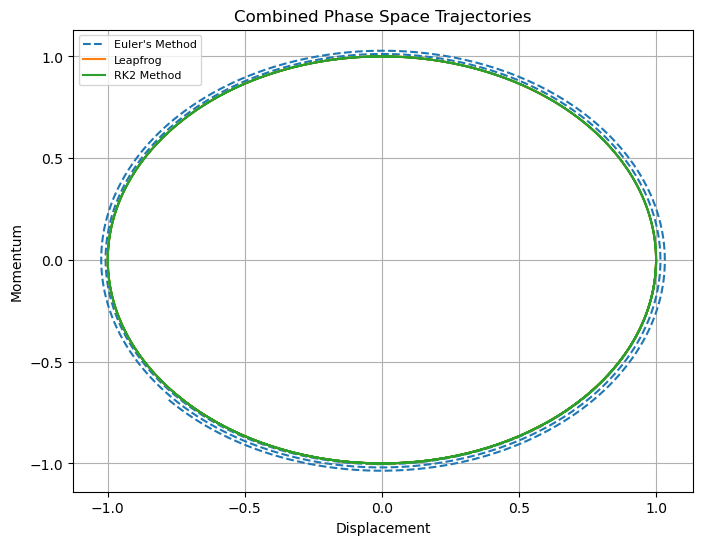

In [94]:
# # Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_euler, m*v_euler,'--', label="Euler's Method") # Phase space trajectory for Euler's method
plt.plot(x, m*v, label='Leapfrog')                   # Phase space trajectory for Leapfrog method
plt.plot(x_rk2, m*v_rk2, label="RK2 Method")         # Phase space trajectory for RK2 method
plt.title('Combined Phase Space Trajectories')
plt.xlabel('Displacement')
plt.ylabel('Momentum')
plt.legend(loc='upper left', fontsize= 8)
plt.grid()
plt.show()

Here we can observe that main changes happened in euler trajectory as the Euler method is a first-order numerical procedure for solving ordinary differential equations (ODEs). The local truncation error is proportional to the square of the step size $ dt^2 $ while the global truncation error (the error at a given time) is proportional to the step size $dt$ . 

 Reducing the step size $dt$ makes the curve more accurate because smaller steps yield a better approximation of the curve’s slope at each point. Since the Euler method uses the slope at the beginning of the interval to estimate the end of the interval, smaller intervals mean that the linear approximation is a better representation of the actual curve. This is why, as $dt$ decreases, the numerical solution converges to the exact solution, and the curve becomes closer to the true trajectory of the system. 

#### Note: There also some correction for other methods but there intitial error was too small that we can't observe the new changes.

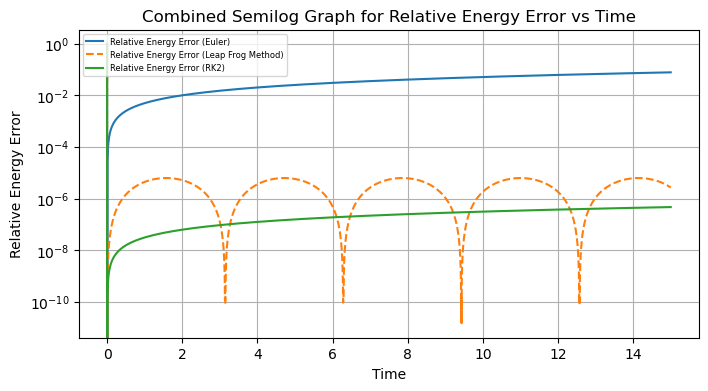

In [95]:
# Calculate relative energy error for euler method
E_total_euler = KE_euler + PE_euler
relative_error_euler = np.abs((E_total_euler - E_total_euler[1]) / E_total_euler[1])    # relative error from euler method

# Calculate relative energy error for leap frog method
E_total = KE + PE
relative_error_leap_frog = np.abs((E_total - E_total[1]) / E_total[1])                  # relative error from leapfrog method

# Calculate relative energy error for RK2 method
E_total_rk2 = KE_rk2 + PE_rk2
relative_error_rk2 = np.abs((E_total_rk2 - E_total_rk2[1]) / E_total_rk2[1])            # relative error from RK2 method


# Plotting combined semilog graph
plt.figure(figsize=(8, 4))

# Plotting energy and relative error on the same graph (semilogy graph)
plt.semilogy(t, relative_error_euler,label='Relative Energy Error (Euler)')
plt.semilogy(t, relative_error_leap_frog, '--',label='Relative Energy Error (Leap Frog Method)')
plt.semilogy(t, relative_error_rk2, label='Relative Energy Error (RK2)')
plt.xlabel('Time')
plt.ylabel('Relative Energy Error')
plt.title('Combined Semilog Graph for Relative Energy Error vs Time')
plt.legend(loc='upper left', fontsize= 6)

plt.grid(True)
plt.show()


Reducing the step size increases the number of time steps required to cover the same duration of simulation. Comparing the plot of relative energy error versus time from part b) and part c), we can see that after reducing the step size by half, relative error has been reduced. The results are more accurate after reducing step size. The energy conservation properties improve with smaller step sizes. Though, relative energy error of the individual method has been decreased, but still relative error from rk2 method is less that leapfrog and euler's method. 

## **part d)**
**Redo the calculation in part (b) using a higher order method, RK4 or RK45n. Comment on your results.**

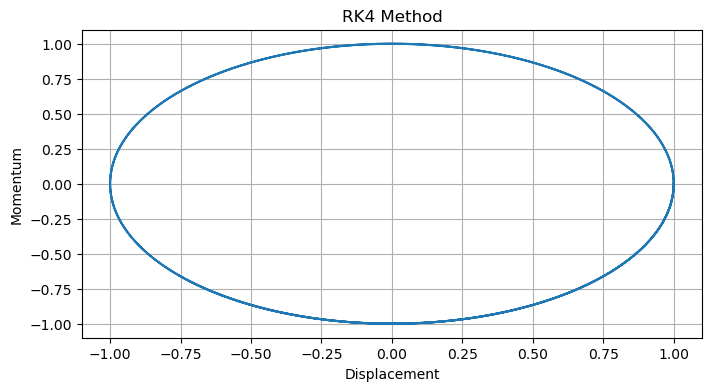

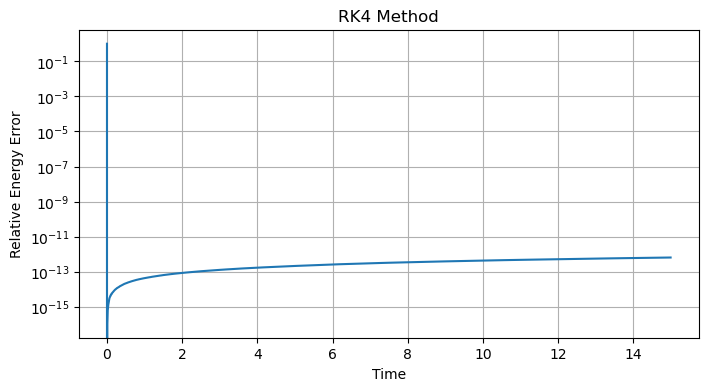

In [96]:
# RK4 method integration

import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1.0  # Spring constant
m = 1.0  # Mass
omega = np.sqrt(k / m)  # Angular frequency

# Time parameters
t_max = 15.0  # Maximum time
dt = 0.005  # Time step
n_steps = int(t_max / dt)  # Number of time steps
t = np.zeros(n_steps)

# Initialize arrays for position, velocity, kinetic energy, potential energy, and time
x_rk4 = np.zeros(n_steps)
v_rk4 = np.zeros(n_steps)
KE_rk4 = np.zeros(n_steps)   # Kinetic Energy
PE_rk4 = np.zeros(n_steps)   # Potential Energy

# Set initial conditions
x_rk4[0] = x0
v_rk4[0] = v0

for i in range(1, n_steps):
    t[i] = t[i-1] + dt
    k1_x = v_rk4[i-1] * dt
    k1_v = (-k / m) * x_rk4[i-1] * dt
    k2_x = (v_rk4[i-1] + 0.5 * k1_v) * dt
    k2_v = (-k / m) * (x_rk4[i-1] + 0.5 * k1_x) * dt
    k3_x = (v_rk4[i-1] + 0.5 * k2_v) * dt
    k3_v = (-k / m) * (x_rk4[i-1] + 0.5 * k2_x) * dt
    k4_x = (v_rk4[i-1] + k3_v) * dt
    k4_v = (-k / m) * (x_rk4[i-1] + k3_x) * dt
    x_rk4[i] = x_rk4[i-1] + (1 / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    v_rk4[i] = v_rk4[i-1] + (1 / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
    
    KE_rk4[i] = 0.5 * m * v_rk4[i]**2
    PE_rk4[i] = 0.5 * k * x_rk4[i]**2

# Calculate total energy (should remain constant)
E_total_rk4 = KE_rk4 + PE_rk4

# Calculate relative energy error for RK4 method
relative_error_rk4 = np.abs((E_total_rk4 - E_total_rk4[1]) / E_total_rk4[1])

# Plotting combined phase space trajectories
plt.figure(figsize=(8, 4))
plt.plot(x_rk4, m * v_rk4)
plt.title('RK4 Method')
plt.xlabel('Displacement')
plt.ylabel('Momentum')
plt.grid()
plt.show()

# Plotting combined semilog graph for relative energy error
plt.figure(figsize=(8, 4))
plt.semilogy(t, relative_error_rk4, label='Relative Energy Error (RK4)')
plt.xlabel('Time')
plt.ylabel('Relative Energy Error')
plt.title('RK4 Method')
plt.grid()
plt.show()


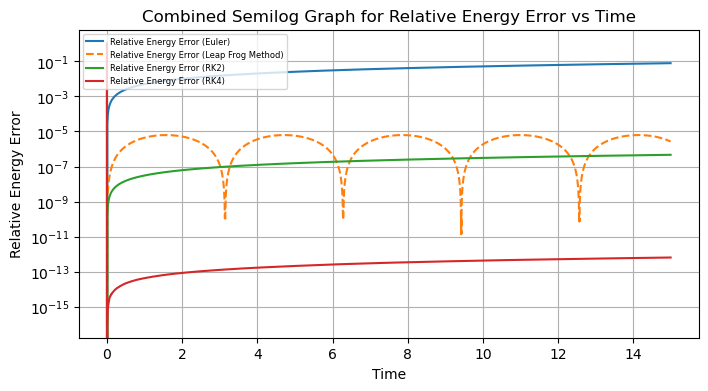

In [97]:
# Plotting combined semilog graph for relative energy error
plt.figure(figsize=(8,4))
plt.semilogy(t, relative_error_euler, label='Relative Energy Error (Euler)')
plt.semilogy(t, relative_error_leap_frog,'--', label='Relative Energy Error (Leap Frog Method)')
plt.semilogy(t, relative_error_rk2, label='Relative Energy Error (RK2)')
plt.semilogy(t, relative_error_rk4, label='Relative Energy Error (RK4)')
plt.xlabel('Time')
plt.ylabel('Relative Energy Error')
plt.title('Combined Semilog Graph for Relative Energy Error vs Time')
plt.legend(loc='upper left', fontsize=6)
plt.grid(True)
plt.show()


RK4 is a fourth-order method, meaning that the error in each step is proportional to the fourth power of the time step. This results in higher accuracy compared to lower-order methods like RK2. From the plot of phase trajectory, we can see that energy is conserved. And from the plot of relative energy error and time, we can see that relative energy error is nearly about the order of 10^-13, which is very lower that that of all other methods, we have used in part a). RK4's higher accuracy, improved stability make it a preferred method for numerical integration over Euler's method, RK2, and the Leapfrog method.

# **Question 2**
**Let us play a game popular on many campuses: Humans vs. Zombies! The students join one of two groups, designated as Humans and Zombies, respectively. Members of each group are armed with toy dart guns. To make it interesting, let us assume that the firing rates, or “kill” rates, between the groups are different. Let $H$ be the number of Humans with a kill rate $\lambda_h$, and $Z$ the number of Zombies with a kill rate $\lambda_z$. In the simplest model, we can assume that the number of Humans decreases at a rate proportional to the kill rate and the number of Zombies, and vice versa. This model can be written as:**

$$
\frac{dH}{dt} = - \lambda_z Z \quad \text{and} \quad \frac{dZ}{dt} = - \lambda_h H
$$


**The game ends when one side reaches zero, and the other side is the winner.**


## **part a)**
**Say you are the last one to join, and you are free to choose either group. The current situation is as follows: 69 Humans with a kill rate $\lambda_h = 2$, and 99 Zombies with a kill rate $\lambda_z = 1$. There are fewer Humans, but they have twice the kill rate. If your goal is to win, which group would you join? Choose wisely.**

### Leapfrog Method for Solving Differential Equations

We will solve two coupled differential equations using The Leapfrog method.
Given the system of differential equations:

$$
\frac{dH}{dt} = -\lambda_z Z \\\
\frac{dZ}{dt} = -\lambda_h H
$$


#### Initialization

- Initialize the variables: $H_0 = 69$, $Z_0 = 99$, $\lambda_h = 2$, and $\lambda_z = 1$.
- Choose a small time step $\Delta t = 0.001 $.

The winner is Zombies at t = 1.75 units of time.


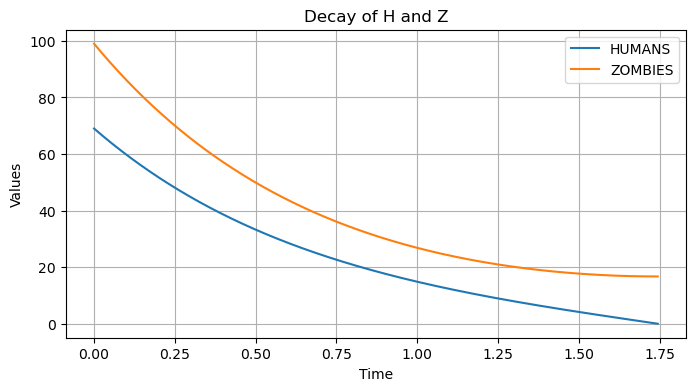

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_h = 2    # kill rates of humans
lambda_z = 1    # kill rates of zombies
H0 = 69         # initial numbers of humans
Z0 = 99         # initial numbers of zombies
dt = 0.001  # Time step for leapfrog integration

# Initialize arrays to store results
H_values = [H0]
Z_values = [Z0]

# Define functions for the derivatives
def dHdt(Z):
    return -lambda_z * Z

def dZdt(H):
    return -lambda_h * H

# Leapfrog integration
while H_values[-1] > 0 and Z_values[-1] > 0:
    H_half = H_values[-1] + 0.5 * dt * dHdt(Z_values[-1])    # Half step in H
    Z_values.append(Z_values[-1] + dt * dZdt(H_half))        # full step in Z
    H_values.append(H_half + 0.5 * dt * dHdt(Z_values[-1]))  # remaining half step in H
    

# Determine the winner
if H_values[-1] <= 0: 
    winner = 'Zombies'
    winning_time = len(H_values) * dt
else:
    winner = 'Humans'
    winning_time = len(Z_values) * dt

print(f"The winner is {winner} at t = {winning_time:.2f} units of time.")

# Plotting

plt.figure(figsize=(8, 4))
plt.plot(np.arange(0, len(H_values) * dt, dt), H_values, label='HUMANS')
plt.plot(np.arange(0, len(Z_values) * dt, dt), Z_values, label='ZOMBIES')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Decay of H and Z')
plt.legend()
plt.grid(True)
plt.show()


From the output of the code, we can see that if see that if initial humans are 69, and initial zombies are 99; zombies wins. So, I would join the group of zombies.

## **part b)**
**It is war now! Simulate the game by solving the model with the initial condition as: λ = 2.0, λ = 1.0; if you decided to join the Humans, then H = 70, Z = 99; otherwise H = 69, Z = 100. Plot the H-t and Z-t curves when the game ends. You may use either RK2/RK4 or the leapfrog method. Are you victorious? Why?**

The winner is Zombies at t = 3.74 units of time.


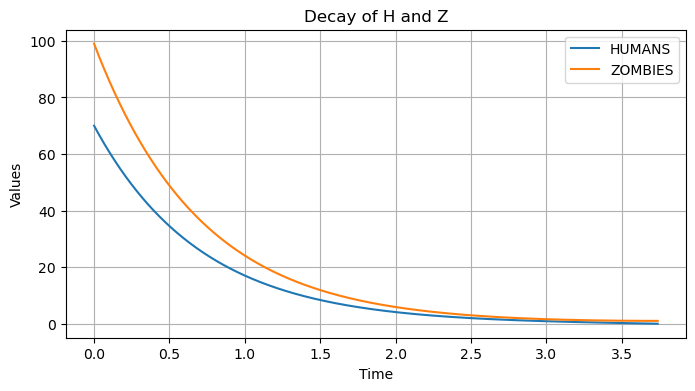

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_h = 2    # kill rates of humans
lambda_z = 1    # kill rates of zombies
H0 = 70         # initial numbers of humans
Z0 = 99         # initial numbers of zombies
dt = 0.001  # Time step for leapfrog integration

# Initialize arrays to store results
H_values = [H0]
Z_values = [Z0]

# Define functions for the derivatives
def dHdt(Z):
    return -lambda_z * Z

def dZdt(H):
    return -lambda_h * H

# Leapfrog integration
while H_values[-1] > 0 and Z_values[-1] > 0:
    H_half = H_values[-1] + 0.5 * dt * dHdt(Z_values[-1])    # Half step in H
    Z_values.append(Z_values[-1] + dt * dZdt(H_half))        # full step in Z
    H_values.append(H_half + 0.5 * dt * dHdt(Z_values[-1]))  # remaining half step in H
    

# Determine the winner
if H_values[-1] <= 0: 
    winner = 'Zombies'
    winning_time = len(H_values) * dt
else:
    winner = 'Humans'
    winning_time = len(Z_values) * dt

print(f"The winner is {winner} at t = {winning_time:.2f} units of time.")

# Plotting

plt.figure(figsize=(8,4))
plt.plot(np.arange(0, len(H_values) * dt, dt), H_values, label='HUMANS')
plt.plot(np.arange(0, len(Z_values) * dt, dt), Z_values, label='ZOMBIES')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Decay of H and Z')
plt.legend()
plt.grid(True)
plt.show()


## **part c)**
**Switch sides and repeat (b).**

The winner is Zombies at t = 1.56 units of time.


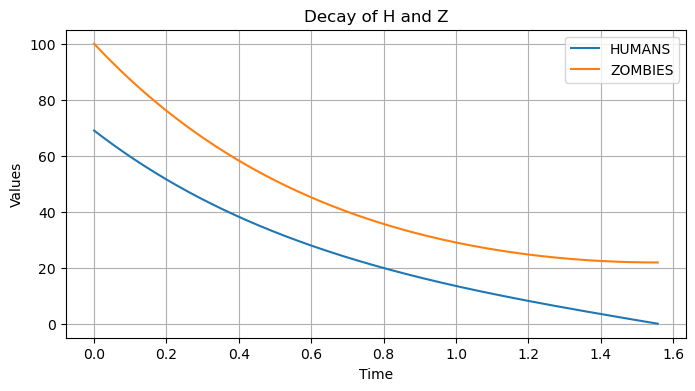

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_h = 2    # kill rates of humans
lambda_z = 1    # kill rates of zombies
H0 = 69        # initial numbers of humans
Z0 = 100        # initial numbers of zombies
dt = 0.001  # Time step for leapfrog integration

# Initialize arrays to store results
H_values = [H0]
Z_values = [Z0]

# Define functions for the derivatives
def dHdt(Z):
    return -lambda_z * Z

def dZdt(H):
    return -lambda_h * H

# Leapfrog integration
while H_values[-1] > 0 and Z_values[-1] > 0:
    H_half = H_values[-1] + 0.5 * dt * dHdt(Z_values[-1])    # Half step in H
    Z_values.append(Z_values[-1] + dt * dZdt(H_half))        # full step in Z
    H_values.append(H_half + 0.5 * dt * dHdt(Z_values[-1]))  # remaining half step in H
    

# Determine the winner
if H_values[-1] <= 0: 
    winner = 'Zombies'
    winning_time = len(H_values) * dt
else:
    winner = 'Humans'
    winning_time = len(Z_values) * dt

print(f"The winner is {winner} at t = {winning_time:.2f} units of time.")

# Plotting

plt.figure(figsize=(8,4))
plt.plot(np.arange(0, len(H_values) * dt, dt), H_values, label='HUMANS')
plt.plot(np.arange(0, len(Z_values) * dt, dt), Z_values, label='ZOMBIES')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Decay of H and Z')
plt.legend()
plt.grid(True)
plt.show()


#### In both the cases Zombies will be victorious 

## **part d)**
**Run the program with different initial H, say 80, 100, 120, etc., and for each H, find the upper limit Z such that the Humans barely win. Plot H vs. Z, and you should discover a scaling law, i.e., $ H/Z = C $. Find the constant C. As it turns out, the model yields analytic solutions. Find them, and discuss how C is related to $ λ_h and λ_z $.**


For Initial H = 80

zombies won, initial number of z= 114,initial number of h = 80, -0.011140124945813498 humans left


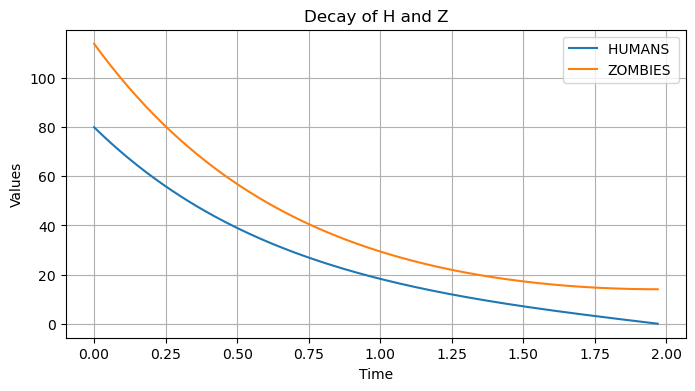

In [101]:
# Initialize variables and lists
h0 = 80   # then replce by [ 100 ,120 ]
z0 = 0
k = 0
dt = 0.01
zombies_won = False
game_over = False
h = [h0]  # Initial number of humans
z = [z0]  # Initial number of zombies
T = [0]   # List to store time values
t = 0     # Initial time

# Simulation loop                                                                                                                                                                           
while not zombies_won:
    while not game_over:
        # Leap Frog method

        # Half step in H
        dhdt = -lambda_z * z[k]
        h_next = h[k] + dhdt * dt / 2

        # Full step in Z
        dzdt = -lambda_h * h_next
        z_next = z[k] + dzdt * dt
        z = z + [z_next]

        # Remaining half step in H
        dhdt = -lambda_z * z[k + 1]
        h_next = h_next + dhdt * dt / 2
        h = h + [h_next]

        # Update iteration and time
        k += 1
        t += dt
        T = T + [t]

        # Check for game over
        if h[k] <= 0 or z[k] <= 0:
            game_over = True

    # Check if zombies won
    if h[k] <= 0:
        print(f"zombies won, initial number of z= {z[0]},initial number of h = {h[0]}, {h[-1]} humans left")
        zombies_won = True
    else:
        # Reset for next simulation
        h.clear()  
        z.clear()
        T.clear()
        z0 = z0 + 1   # Increase the initial no. by 1 for next simulation
        k = 0
        h = [h0]
        z = [z0]
        t = 0
        T = [t]   # Initialize the T list with currenet time for next simulation
        game_over = False
        
        
#Plotting
plt.figure(figsize=(8,4))
plt.plot(T, h, label='HUMANS ')
plt.plot(T, z, label='ZOMBIES')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Decay of H and Z')
plt.legend()
plt.grid(True)
plt.show()


For Initial H = 100

zombies won, initial number of z= 142,initial number of h = 100, -0.02863267910963871 humans left


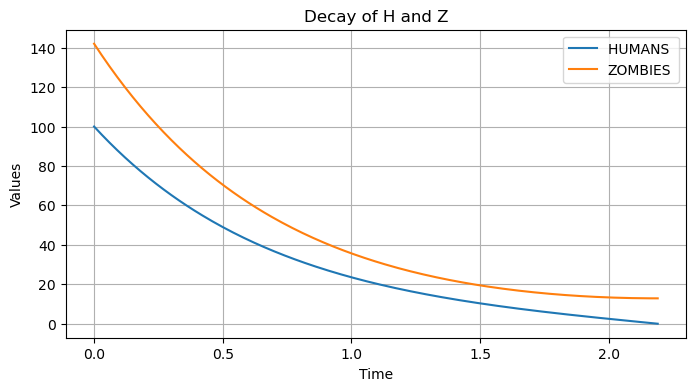

In [102]:
# Initialize variables and lists
h0 = 100   # then replce by [ 100 ,120 ]
z0 = 0
k = 0
dt = 0.01
zombies_won = False
game_over = False
h = [h0]  # Initial number of humans
z = [z0]  # Initial number of zombies
T = [0]   # List to store time values
t = 0     # Initial time

# Simulation loop                                                                                                                                                                           
while not zombies_won:
    while not game_over:
        # Leap Frog method

        # Half step in H
        dhdt = -lambda_z * z[k]
        h_next = h[k] + dhdt * dt / 2

        # Full step in Z
        dzdt = -lambda_h * h_next
        z_next = z[k] + dzdt * dt
        z = z + [z_next]

        # Remaining half step in H
        dhdt = -lambda_z * z[k + 1]
        h_next = h_next + dhdt * dt / 2
        h = h + [h_next]

        # Update iteration and time
        k += 1
        t += dt
        T = T + [t]

        # Check for game over
        if h[k] <= 0 or z[k] <= 0:
            game_over = True

    # Check if zombies won
    if h[k] <= 0:
        print(f"zombies won, initial number of z= {z[0]},initial number of h = {h[0]}, {h[-1]} humans left")
        zombies_won = True
    else:
        # Reset for next simulation
        h.clear()  
        z.clear()
        T.clear()
        z0 = z0 + 1   # Increase the initial no. by 1 for next simulation
        k = 0
        h = [h0]
        z = [z0]
        t = 0
        T = [t]   # Initialize the T list with currenet time for next simulation
        game_over = False
        
        
#Plotting
plt.figure(figsize=(8,4))
plt.plot(T, h, label='HUMANS ')
plt.plot(T, z, label='ZOMBIES')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Decay of H and Z')
plt.legend()
plt.grid(True)
plt.show()


For Initial H = 120

zombies won, initial number of z= 170,initial number of h = 120, -0.02157152227188358 humans left


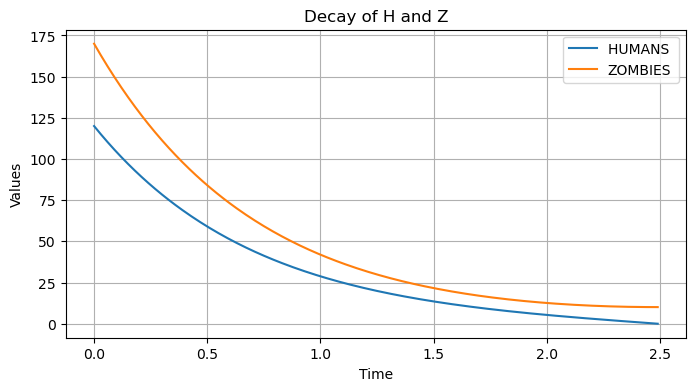

In [103]:
# Initialize variables and lists
h0 = 120   
z0 = 0
k = 0
dt = 0.01
zombies_won = False
game_over = False
h = [h0]  # Initial number of humans
z = [z0]  # Initial number of zombies
T = [0]   # List to store time values
t = 0     # Initial time

# Simulation loop                                                                                                                                                                           
while not zombies_won:
    while not game_over:
        # Leap Frog method

        # Half step in H
        dhdt = -lambda_z * z[k]
        h_next = h[k] + dhdt * dt / 2

        # Full step in Z
        dzdt = -lambda_h * h_next
        z_next = z[k] + dzdt * dt
        z = z + [z_next]

        # Remaining half step in H
        dhdt = -lambda_z * z[k + 1]
        h_next = h_next + dhdt * dt / 2
        h = h + [h_next]

        # Update iteration and time
        k += 1
        t += dt
        T = T + [t]

        # Check for game over
        if h[k] <= 0 or z[k] <= 0:
            game_over = True

    # Check if zombies won
    if h[k] <= 0:
        print(f"zombies won, initial number of z= {z[0]},initial number of h = {h[0]}, {h[-1]} humans left")
        zombies_won = True
    else:
        # Reset for next simulation
        h.clear()  
        z.clear()
        T.clear()
        z0 = z0 + 1   # Increase the initial no. by 1 for next simulation
        k = 0
        h = [h0]
        z = [z0]
        t = 0
        T = [t]   # Initialize the T list with currenet time for next simulation
        game_over = False
        
        
#Plotting
plt.figure(figsize=(8,4))
plt.plot(T, h, label='HUMANS ')
plt.plot(T, z, label='ZOMBIES')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Decay of H and Z')
plt.legend()
plt.grid(True)
plt.show()


#### Changing the values of H0 in range HUMANS = [80, 100, 120]   
#### we get corrosponding values of Z AS  ZOMBIES = [114, 142, 170]


### Slope between Zombies vs Humans  $ C = Z/H $

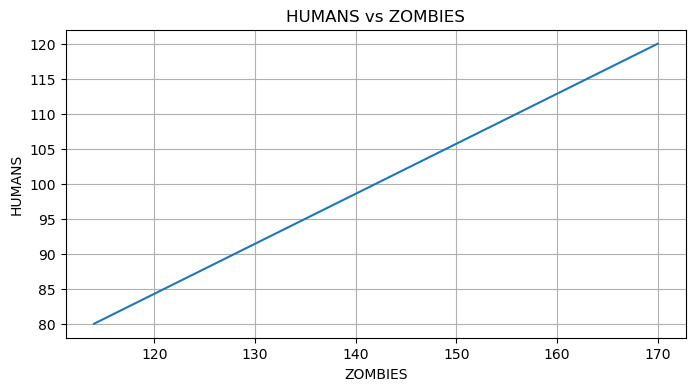

The slope of the line is approximately 0.71


In [104]:
# Given data points:
HUMANS = [80, 100, 120]
ZOMBIES = [114, 142, 170]

# Plotting H vs Z
# 114,142,170

plt.figure(figsize=(8,4))
plt.plot(ZOMBIES, HUMANS)
plt.xlabel('ZOMBIES')
plt.ylabel('HUMANS')
plt.title('HUMANS vs ZOMBIES')
plt.grid(True)
plt.show()

# Calculate the differences in y-values and x-values:
delta_HUMANS = HUMANS[-1] - HUMANS[0]
delta_ZOMBIES = ZOMBIES[-1] - ZOMBIES[0]

# Calculate the slope:
slope = delta_HUMANS / delta_ZOMBIES

print(f"The slope of the line is approximately {slope:.2f}")




Given, differential equations,
### $ \frac{dH}{dZ} = \frac{\lambda_z Z} {\lambda_h H}$

##### $HdH = \frac{\lambda_z} {\lambda_h}ZdZ$

#### $\frac{H^2}{Z^2} = \frac{\lambda_z} {\lambda_h}$

#### $\frac{H}{Z} = \sqrt{\frac{\lambda_z} {\lambda_h}} $

#### $C = \sqrt{\frac{\lambda_z} {\lambda_h}}$
This is the relation between C, $\lambda_z , \lambda_h$

given, $\lambda_z = 1   , \lambda_h = 2$

putting value, C = 0.707

from the result of the code, we can see that value of C = $\frac{H}{Z}$ from Scaling law matches with the analytical value.